In [100]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [101]:
raw_data_df = pd.read_csv('/content/raw_house_data.csv')


In [102]:

raw_data_df.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [103]:
column = raw_data_df.columns
column


Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [104]:
raw_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [105]:

raw_data_df.describe()


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000


#Splitting categorical and numercal features

In [106]:
object_columns_df = raw_data_df.select_dtypes(include=['object'])
numerical_columns_df =raw_data_df.select_dtypes(exclude=['object'])

In [107]:
object_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   kitchen_features  4967 non-null   object
 1   fireplaces        5000 non-null   object
 2   floor_covering    4999 non-null   object
 3   HOA               4438 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


In [108]:
numerical_columns_df.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


# Missing Values
 Missing Values for each column

In [109]:
#Percentage of NAN Values
NAN_house = [(c, raw_data_df[c].isna().mean()*100) for c in raw_data_df]
NAN_house = pd.DataFrame(NAN_house, columns=["column_name", "percentage"])

In [110]:
NAN_house.sort_values("percentage", ascending=False)

,column_name,percentage
15,HOA,11.24
10,sqrt_ft,1.12
12,kitchen_features,0.66
5,lot_acres,0.20
11,garage,0.14
9,bathrooms,0.12
14,floor_covering,0.02
0,MLS,0.00
1,sold_price,0.00
2,zipcode,0.00


Since, the percentage of nulls for each feature is not more than 50%, so null value could be imputed by mode/ none for categorical features whereas 0/ mean for numercial features

In [111]:
#Number of null values in each feature
null_counts = raw_data_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces            0
floor_covering        1
HOA                 562
dtype: int64


In [112]:
#handling missing values values with all the categorical features
raw_data_df['kitchen_features'] = raw_data_df['kitchen_features'].fillna(raw_data_df['kitchen_features'].mode)
raw_data_df['floor_covering'] = raw_data_df['floor_covering'].fillna(raw_data_df['floor_covering'].mode)
raw_data_df['HOA'] = raw_data_df['HOA'].fillna(0)

In [121]:
#handling missing values values with all the numerical features
raw_data_df['sqrt_ft'] = raw_data_df['sqrt_ft'].fillna(raw_data_df['sqrt_ft'].mean)
raw_data_df['lot_acres'] = raw_data_df['lot_acres'].fillna(raw_data_df['lot_acres'].mean)
raw_data_df['garage'] = raw_data_df['garage'].fillna(0)

In [114]:
#converting the price into readable format...
raw_data_df['sold_price'] = raw_data_df['sold_price'].apply(lambda x: "${:.1f}k".format((x/1000)))

Now the data is clean so we will check for the variance of the features in the dataset..

,count
fireplaces,
1,1806
2,1604
3,849
0,303
4,294
5,89
,25
6,18
7,9


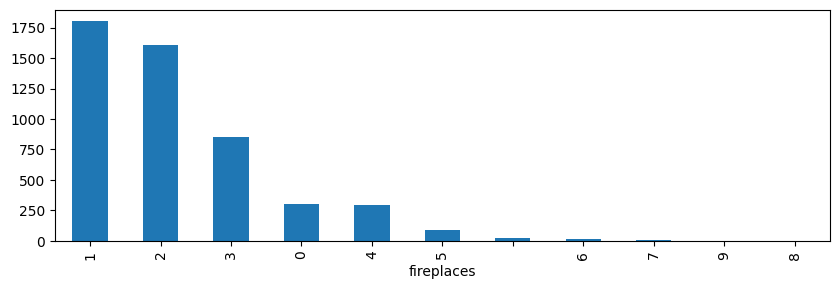

In [115]:
#MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
      # 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       #'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      #dtype='object'

raw_data_df['fireplaces'].value_counts().plot(kind='bar',figsize=[10,3])
raw_data_df['fireplaces'].value_counts()

,count
sold_price,
$550.0k,141
$575.0k,103
$650.0k,97
$600.0k,94
$625.0k,83
...,...
$787.5k,1
$816.5k,1
$829.0k,1


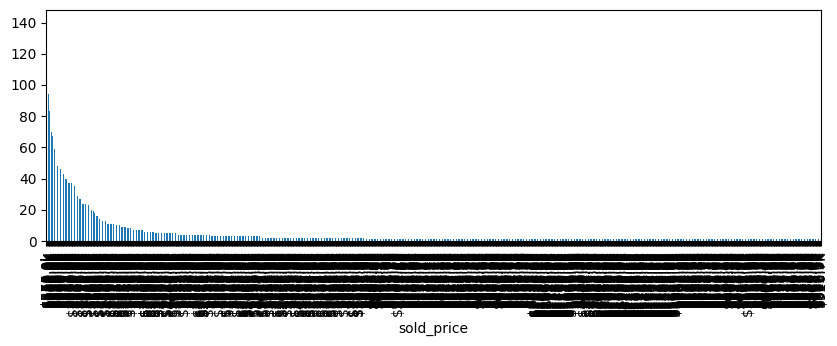

In [122]:
raw_data_df['sold_price'].value_counts().plot(kind='bar',figsize=[10,3])
raw_data_df['sold_price'].value_counts()

,count
zipcode,
85718,1326
85750,779
85755,461
85749,401
85658,288
85737,281
85742,162
85745,155
85739,154


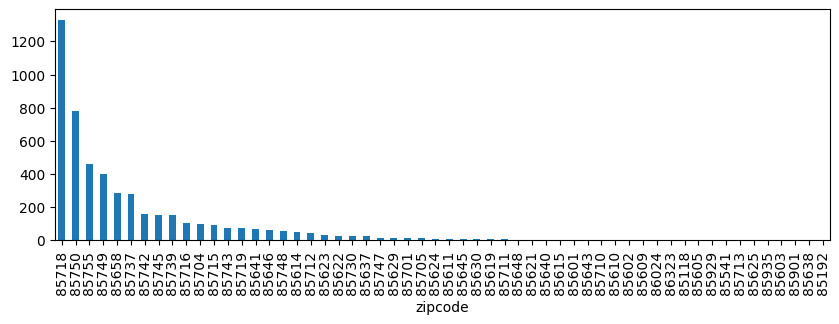

In [116]:
raw_data_df['zipcode'].value_counts().plot(kind='bar',figsize=[10,3])
raw_data_df['zipcode'].value_counts()

In [117]:
#calculating age of the house
raw_data_df['age of house'] = (2024 - raw_data_df['year_built'])

In [123]:
raw_data_df.head(2)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age of house
0,21530491,$5300.0k,85637,-110.378200,31.356362,2154.0,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,83
1,21529082,$4200.0k,85646,-111.045371,31.594213,1707.0,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,27


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


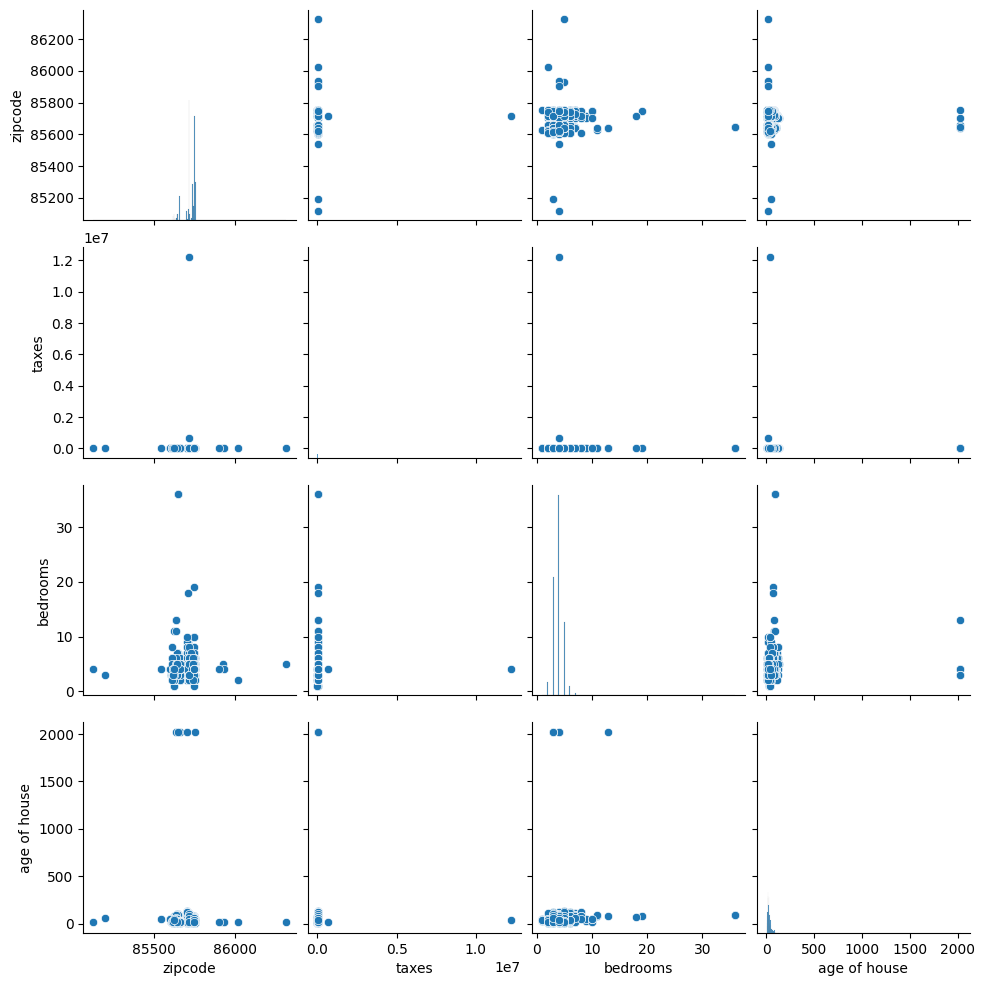

In [126]:
#MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
      # 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       #'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      #dtype='object'

cols = ['sold_price', 'zipcode', 'lot_acres', 'taxes', 'bedrooms', 'sqrt_ft', 'age of house']
sns.pairplot(raw_data_df[cols], size = 2.5)
